## Step 1: Import the breast_cancer dataset and split it into training and testing parts

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
print("Feature Names:",dataset.feature_names)
print("Target Names:",dataset.target_names)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']


In [2]:
x = dataset.data
y = dataset.target
print("Dataset Input shape:",x.shape)
print("Dataset Output shape:",y.shape)

Dataset Input shape: (178, 13)
Dataset Output shape: (178,)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y
                                                    ,random_state=42
                                                    ,test_size = 0.15 )
print("Training Data Input Shape:",x_train.shape)
print("Testing Data Input Shape:",y_train.shape)
print("Training Data Output Shape:",x_test.shape)
print("Testing Data Output Shape:",y_test.shape)

Training Data Input Shape: (151, 13)
Testing Data Input Shape: (151,)
Training Data Output Shape: (27, 13)
Testing Data Output Shape: (27,)


## Step 2: Build the tree
### Import the class *DecisionTreeClassifier* from sklearn.tree module.
#### We can use parameter *croterion* to set the metric for the split. Possible metrics are 'gini' (default), 'entropy' or 'log_loss'.

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier()
tree1.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
tree2 = DecisionTreeClassifier(criterion = 'entropy')
tree2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Step 3: Evaluate the performance of the tree

--> Compute both Training Accuracy and Test Accuracy to check overfitting

In [12]:
from sklearn.metrics import accuracy_score

training_accuracy = accuracy_score(y_train, tree1.predict(x_train))
test_accuracy = accuracy_score(y_test, tree1.predict(x_test))                               
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9259259259259259


In [14]:
training_accuracy2 = accuracy_score(y_train, tree2.predict(x_train))
test_accuracy2 = accuracy_score(y_test, tree2.predict(x_test))                               
print("Training Accuracy:", training_accuracy2)
print("Testing Accuracy:", test_accuracy2)

Training Accuracy: 1.0
Testing Accuracy: 0.8888888888888888


## Step 4: Visualize the tree
### Visual tree can be generated using *sklearn.tree.export_graphviz(tree, out_file, class_names, feature_names, impurity, filled)* function. Which return a .dot file with the reqired graph. 

[Text(0.5, 0.9, 'color_intensity <= 3.82\ngini = 0.659\nsamples = 151\nvalue = [50, 60, 41]\nclass = class_1'),
 Text(0.3, 0.7, 'proline <= 1002.5\ngini = 0.105\nsamples = 54\nvalue = [3, 51, 0]\nclass = class_1'),
 Text(0.2, 0.5, 'ash <= 3.07\ngini = 0.038\nsamples = 52\nvalue = [1, 51, 0]\nclass = class_1'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 51\nvalue = [0, 51, 0]\nclass = class_1'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = class_0'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = class_0'),
 Text(0.7, 0.7, 'flavanoids <= 1.4\ngini = 0.578\nsamples = 97\nvalue = [47, 9, 41]\nclass = class_0'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = class_2'),
 Text(0.8, 0.5, 'proline <= 724.5\ngini = 0.27\nsamples = 56\nvalue = [47, 9, 0]\nclass = class_0'),
 Text(0.7, 0.3, 'alcohol <= 13.145\ngini = 0.18\nsamples = 10\nvalue = [1, 9, 0]\nclass = class_1'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0

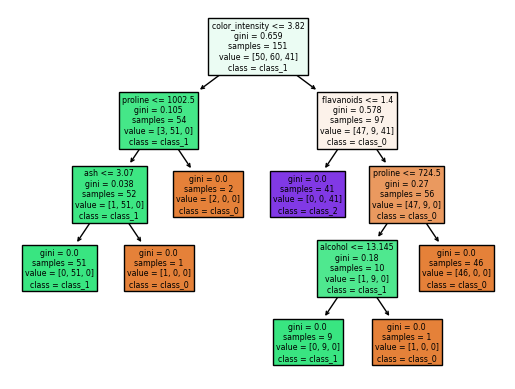

In [28]:
from sklearn.tree import plot_tree

plot_tree(tree1, class_names = dataset.target_names,
               feature_names = dataset.feature_names,impurity = True,
               filled = True)

### Install graphviz module using *conda/pip install python-graphviz* to view the .dot file.

--> Import the graphviz mdule

--> Open the dot file and read the content into a variable

--> Use Source function of graphviz module to display the tree

In [21]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 47.2/47.2 kB 474.1 kB/s eta 0:00:00


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Step 5: Handle the overfitting by limiting the depth
### Use *max_depth* parameter with DecisionTreeClassifier() to limit the depth